Columns in dataset: Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')
Missing columns: {'Close'}
Renamed column Close/Last to Close


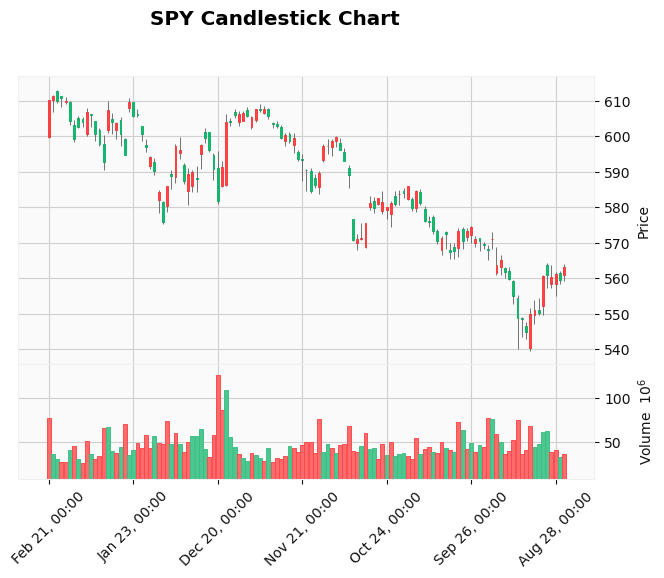

In [3]:
import pandas as pd
import mplfinance as mpf

# Load the CSV file
data_path = '/Users/filippuzic/Desktop/DS311/DS311_Project1_Remix/HistoricalData_SPY.csv'
df = pd.read_csv(data_path)

# Check and clean column names
df.columns = df.columns.str.strip()
print("Columns in dataset:", df.columns)  # Debugging step

# Ensure proper date format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Identify actual column names
actual_columns = set(df.columns)
expected_columns = {'Open', 'High', 'Low', 'Close', 'Volume'}
missing_columns = expected_columns - actual_columns

# Handle potential naming discrepancies
if missing_columns:
    print(f"Missing columns: {missing_columns}")
    for col in missing_columns:
        for actual_col in actual_columns:
            if col.lower() in actual_col.lower():  # Case insensitive match
                df.rename(columns={actual_col: col}, inplace=True)
                print(f"Renamed column {actual_col} to {col}")

# Verify if necessary columns exist before plotting
if not expected_columns.issubset(df.columns):
    raise ValueError(f"Still missing columns after renaming: {expected_columns - set(df.columns)}")

# Plot the candlestick chart
mpf.plot(df, type='candle', style='yahoo', title='SPY Candlestick Chart', ylabel='Price', volume=True)


ValueError: x and y must be the same size

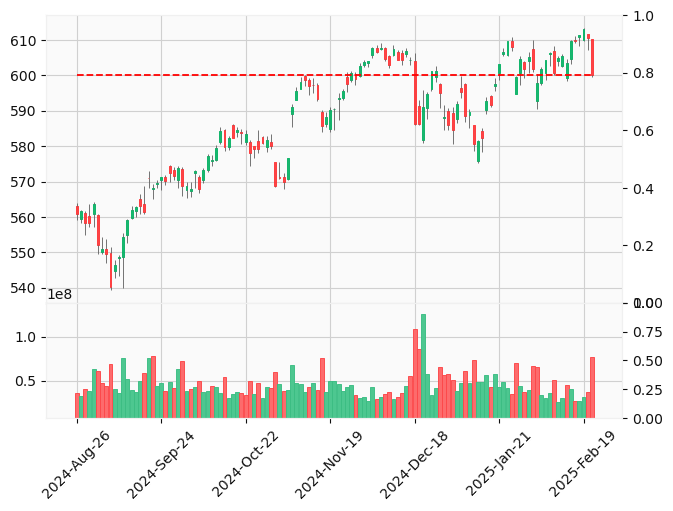

In [4]:
# Sort the dataframe by date in ascending order (oldest to newest)
df = df.sort_index(ascending=True)

# Get the latest close price and its corresponding date
latest_close_price = df['Close'].iloc[-1]
latest_date = df.index[-1]

# Create a series for the horizontal line (same length as the dataframe)
horizontal_line = pd.Series(latest_close_price, index=df.index)

# Create a scatter plot for the current price indicator
current_price_indicator = pd.Series(latest_close_price, index=[latest_date])

# Add the horizontal line and current price indicator
addplot = [
    mpf.make_addplot(horizontal_line, linestyle='--', color='red'),  # Dotted horizontal line
    mpf.make_addplot(current_price_indicator, type='scatter', markersize=100, marker='.', color='blue')  # Current price indicator
]

# Plot the candlestick chart
mpf.plot(df, type='candle', style='yahoo', title='SPY Candlestick Chart', ylabel='Price', volume=True, addplot=addplot)

In [5]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
data = pd.read_csv('/Users/filippuzic/Desktop/DS311/DS311_Project1_Remix/HistoricalData_SPY.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close/Last']
)])

# Customize the layout to resemble TradingView's style
fig.update_layout(
    title='SPY Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Hide the range slider
    template='plotly_dark',  # Use a dark theme similar to TradingView
    xaxis=dict(
        type='date',
        tickformat='%Y-%m-%d',
        showgrid=True,
        gridcolor='gray',
        rangeslider=dict(visible=False)
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='gray'
    ),
    plot_bgcolor='black',  # Background color
    paper_bgcolor='black',  # Plot area color
    font=dict(color='white')  # Font color
)

# Show the chart
fig.show()

In [6]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
data = pd.read_csv('/Users/filippuzic/Desktop/DS311/DS311_Project1_Remix/HistoricalData_SPY.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date (ensure it's in chronological order)
data = data.sort_values('Date')

# Calculate the 200-day moving average
data['200_MA'] = data['Close/Last'].rolling(window=200, min_periods=1).mean()

# Calculate Bollinger Bands
window = 20  # Bollinger Bands window
data['20_MA'] = data['Close/Last'].rolling(window=window, min_periods=1).mean()
data['20_STD'] = data['Close/Last'].rolling(window=window, min_periods=1).std()
data['Upper_Band'] = data['20_MA'] + (2 * data['20_STD'])
data['Lower_Band'] = data['20_MA'] - (2 * data['20_STD'])

# Create the candlestick chart
fig = go.Figure()

# Add candlestick trace
fig.add_trace(go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close/Last'],
    name='Candlesticks'
))

# Add 200-day moving average
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['200_MA'],
    mode='lines',
    line=dict(color='blue', width=2),
    name='200-Day MA'
))

# Add Bollinger Bands
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['Upper_Band'],
    mode='lines',
    line=dict(color='orange', width=1),
    name='Upper Bollinger Band'
))
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['Lower_Band'],
    mode='lines',
    line=dict(color='orange', width=1),
    name='Lower Bollinger Band'
))

# Customize the layout to resemble TradingView's style
fig.update_layout(
    title='SPY Candlestick Chart with 200-Day MA and Bollinger Bands',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,  # Hide the range slider
    template='plotly_dark',  # Use a dark theme similar to TradingView
    xaxis=dict(
        type='date',
        tickformat='%Y-%m-%d',
        showgrid=True,
        gridcolor='gray',
        rangeslider=dict(visible=False)
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='gray',
        title='Price'
    ),
    plot_bgcolor='black',  # Background color
    paper_bgcolor='black',  # Plot area color
    font=dict(color='white'),  # Font color
    legend=dict(x=0.02, y=0.98)  # Position the legend
)

# Show the chart
fig.show()

In [7]:
import pandas as pd
import plotly.express as px

# Sample data for Nasdaq 100 stocks and their performance
data = {
    "Sector": ["Technology", "Technology", "Technology", "Technology", "Technology", 
               "Communication Services", "Communication Services", "Communication Services", 
               "Healthcare", "Healthcare", "Consumer Discretionary", "Consumer Discretionary", 
               "Industrials", "Industrials", "Consumer Staples", "Consumer Staples"],
    "Stock": ["AAPL", "NVDA", "MSFT", "AVGO", "CSCO", "GOOGL", "GOOG", "META", 
              "ISRG", "GILD", "AMZN", "TSLA", "COST", "SBUX", "PEP", "MDLZ"],
    "Change (%)": [0.63, -3.09, -1.03, -4.91, 0.45, -0.23, -0.21, -2.26, 
                   1.12, -0.89, -1.79, -2.15, 0.06, -0.45, 0.12, -0.34]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Create the TreeMap
fig = px.treemap(
    df,
    path=['Sector', 'Stock'],  # Hierarchy: Sector -> Stock
    values=abs(df['Change (%)']),  # Size of the boxes based on absolute percentage change
    color='Change (%)',         # Color based on percentage change
    color_continuous_scale=['red', 'white', 'green'],  # Red for negative, green for positive
    color_continuous_midpoint=0,  # Neutral point for white color
    title='Nasdaq 100 Heatmap at Close: Feb 24 4:00 PM EST',
    hover_data={'Change (%)': ':.2f%'},  # Display percentage change on hover
    labels={'Change (%)': 'Change (%)'}
)

# Customize the layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),  # Adjust margins
    title_font=dict(size=20, color='black'),  # Title font
    font=dict(size=14, color='black'),  # General font
    treemapcolorway=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],  # Custom colorway
)

# Customize the hover template
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Change: %{color:.2f}%<extra></extra>'
)

# Show the TreeMap
fig.show()